#### 사전준비

In [1]:
# from google.colab import drive
# drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# cd drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [30]:
!pip install konlpy
!pip install soynlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
from konlpy.tag import Okt
from tensorflow.keras import layers, Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv("test.csv")

In [33]:
x = train['사람문장1']
y = train['감정_대분류']

In [34]:
X = test['사람문장1']
Y = test['감정_대분류']

In [35]:
stop_words = '께 을 를 에게 은 는 이 가 . 게 로 에'.split()

#### okt 형태소 분류

In [36]:
okt = Okt()

token_sentence = []
for sentence in x:
  tokens = []
  for word in okt.pos(sentence,stem = True):
    if word[0] not in stop_words:
      tokens.append(word[0])
  token_sentence.append(tokens)

In [37]:
x_train = pd.DataFrame(x)
x_train['token_sentence'] = token_sentence
x_train

,사람문장1,token_sentence
0,아내가 드디어 출산하게 되어서 정말 신이 나.,"[아내, 드디어, 출산, 하다, 되어다, 정말, 신, 나]"
1,당뇨랑 합병증 때문에 먹어야 할 약이 열 가지가 넘어가니까 스트레스야.,"[당뇨, 랑, 합병증, 때문, 먹다, 하다, 약, 열, 가지, 넘어가다, 스트레스, 야]"
2,고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워.,"[고등학교, 올라오다, 중학교, 때, 보다, 수업, 갑자기, 어려워지다, 당황, 스럽다]"
3,재취업이 돼서 받게 된 첫 월급으로 온 가족이 외식을 할 예정이야. 너무 행복해.,"[재, 취업, 돼다, 받다, 되다, 첫, 월급, 으로, 온, 가족, 외식, 하다, ..."
4,빚을 드디어 다 갚게 되어서 이제야 안도감이 들어.,"[빚, 드디어, 다, 갚다, 되어다, 이제야, 안도, 감, 들다]"
...,...,...
40874,같이 사는 친구가 애완견을 데려왔는데 대부분 내가 돌보고 있어. 내가 주인인가 혼란...,"[같이, 살다, 친구, 애완견, 데려오다, 대부분, 내, 돌보다, 있다, 내, 주인..."
40875,지난주에 건강검진 결과가 나왔는데 정상이라고 결과가 나왔어.,"[지난주, 건강검진, 결과, 나오다, 정상, 이라고, 결과, 나오다]"
40876,엄마는 내 꿈인 작가를 응원해 주고는 했는데 지금은 안 그래. 너무 슬퍼.,"[엄마, 내, 꿈, 인, 작가, 응원, 하다, 주다, 하다, 지금, 안, 그렇다, ..."
40877,이렇게 좋은 운동 시설에서 경로 우대로 운동할 수 있다니 참 행운이야.,"[이렇게, 좋다, 운동, 시설, 에서, 경로, 우대, 운동, 하다, 수, 있다, 차..."


In [38]:
okt = Okt()

token_sentence = []
for sentence in X:
  tokens = []
  for word in okt.pos(sentence,stem = True):
    if word[0] not in stop_words:
      tokens.append(word[0])
  token_sentence.append(tokens)

In [39]:
x_test = pd.DataFrame(X)
x_test['token_sentence'] = token_sentence
x_test

,사람문장1,token_sentence
0,요즘 부모님과 많이 부딪혀.,"[요즘, 부모님, 과, 많이, 부딪히다]"
1,엄마가 결국 집을 나갔어. 너무 너무 슬퍼.,"[엄마, 결국, 집, 나가다, 너무, 너무, 슬프다]"
2,학교에서 한 친구를 괴롭히는 무리에게 그만하라고 했어.,"[학교, 에서, 하다, 친구, 괴롭히다, 무리, 그만하다, 하다]"
3,이번에 팀장님이 간단한 조사 업무를 부탁하셨는데 내가 잘못 처리했어. 너무 절망적이야.,"[이번, 팀, 장님, 간단하다, 조사, 업무, 부탁, 하다, 내, 잘못, 처리, 하..."
4,남편이 이혼할 때 위자료를 주지 않으려고 변호사를 고용했어.,"[남편, 이혼, 하다, 때, 위자료, 주지, 않다, 변호사, 고용, 하다]"
...,...,...
5125,부동산 임대 소득으로 현재 여유롭게 살 수 있어서 좋단다.,"[부동산, 임대, 소득, 으로, 현재, 여유롭다, 살, 수, 있다, 좋다]"
5126,폐결핵은 이미 완치된 것 같은데 약을 한 달이나 더 먹으라고 하네? 아직 안 나은 ...,"[폐결핵, 이미, 완치, 되다, 것, 같다, 약, 하다, 달이, 나, 더, 먹다, ..."
5127,연애하고 싶은데 소개팅만 나가면 꽝이야. 이러다가 난 결혼 못 하고 늙어 죽을 거야.,"[연애, 하고, 싶다, 소개팅, 만, 나가다, 꽝, 이야, 이러다가, 난, 결혼, ..."
5128,은행 대출이 막혀서 생활비를 구할 수가 없어. 이제 어떻게 살아야 하나 막막해.,"[은행, 대출, 막히다, 생활비, 구, 하다, 수가, 없다, 이제, 어떻다, 살다,..."


#### 벡터화

In [14]:
# tokenizer=Tokenizer()
# tokenizer.fit_on_texts(x_train["token_sentence"])

In [15]:
# print(len(tokenizer.word_index))

9819


In [16]:
# x_train=tokenizer.texts_to_sequences(x_train['token_sentence'])
# x_train

[[34, 242, 337, 1, 72, 31, 679, 2],
 [407, 83, 1116, 36, 84, 1, 307, 675, 311, 1308, 131, 100],
 [620, 1522, 1453, 57, 13, 654, 124, 1097, 74, 38],
 [1429, 92, 24, 18, 20, 701, 573, 29, 428, 88, 1187, 1, 1365, 19, 3, 297],
 [609, 242, 58, 469, 72, 1098, 1057, 222, 23],
 [90,
  298,
  114,
  1,
  933,
  72,
  4,
  383,
  114,
  1,
  1389,
  1167,
  166,
  44,
  11,
  114,
  1,
  2605,
  561,
  520,
  988,
  293,
  7,
  43,
  21,
  324,
  1454,
  1188],
 [299, 474, 1629, 23, 2606, 59, 496, 173, 19],
 [90, 30, 1630, 989],
 [6, 5, 33, 174, 94, 64, 151, 195, 1, 175, 15],
 [6, 36, 231, 2],
 [192, 376, 2380, 10, 347, 4268, 1, 597, 3283, 589, 53, 1, 4777, 1789, 14, 1],
 [26, 151, 2, 139, 180, 71, 205, 990, 1668, 53, 1, 1487, 3540, 205, 990],
 [4, 1963, 237, 16, 206, 17, 288, 106, 32, 28, 333, 198],
 [34, 32, 80, 124, 972, 24, 3, 580, 78],
 [44, 153, 110, 486, 5, 521, 139, 35, 1, 914, 378, 15, 1057, 1],
 [101,
  194,
  210,
  440,
  4,
  379,
  6904,
  152,
  405,
  1,
  102,
  6,
  5,
  41,
  

In [51]:
# num_token_per_sentence = [ len(sentence) for sentence in x_train ]
# print(max(num_token_per_sentence))

# plt.hist(num_token_per_sentence, bins=20)
# plt.show()

TypeError: ignored

In [22]:
# x_train_pad=pad_sequences(x_train,maxlen=38,padding='post')
# x_train_pad

array([[  34,  242,  337, ...,    0,    0,    0],
       [ 407,   83, 1116, ...,    0,    0,    0],
       [ 620, 1522, 1453, ...,    0,    0,    0],
       ...,
       [  75,    4,  412, ...,    0,    0,    0],
       [ 190,   16,  240, ...,    0,    0,    0],
       [   6,  381,    3, ...,    0,    0,    0]], dtype=int32)

In [23]:
y_train=y.replace({'기쁨':0,'당황':1,'분노':2,'불안':3,'상처':4,'슬픔':5})
y_train

0        0
1        3
2        1
3        0
4        0
        ..
40874    3
40875    0
40876    5
40877    0
40878    3
Name: 감정_대분류, Length: 40879, dtype: int64

In [24]:
# tokenizer=Tokenizer()
# tokenizer.fit_on_texts(x_test["token_sentence"])
# x_test=tokenizer.texts_to_sequences(x_test['token_sentence'])

34


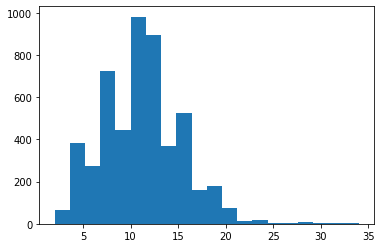

In [25]:
# num_token_per_sentence = [ len(sentence) for sentence in x_test ]
# print(max(num_token_per_sentence))

# plt.hist(num_token_per_sentence, bins=20)
# plt.show()

In [26]:
# x_test_pad=pad_sequences(x_test,maxlen=38,padding='post')
# x_test_pad

array([[  25,   85,   65, ...,    0,    0,    0],
       [  73,  402,   53, ...,    0,    0,    0],
       [  80,   10,    1, ...,    0,    0,    0],
       ...,
       [ 201,   31,   41, ...,    0,    0,    0],
       [1055,  668, 1038, ...,    0,    0,    0],
       [  83,    6,  472, ...,    0,    0,    0]], dtype=int32)

In [27]:
y_test=Y.replace({'기쁨':0,'당황':1,'분노':2,'불안':3,'상처':4,'슬픔':5})
y_test

0       2
1       5
2       3
3       1
4       2
       ..
5125    0
5126    3
5127    2
5128    2
5129    2
Name: 감정_대분류, Length: 5130, dtype: int64

#### tf-idf

In [40]:
x_train

,사람문장1,token_sentence
0,아내가 드디어 출산하게 되어서 정말 신이 나.,"[아내, 드디어, 출산, 하다, 되어다, 정말, 신, 나]"
1,당뇨랑 합병증 때문에 먹어야 할 약이 열 가지가 넘어가니까 스트레스야.,"[당뇨, 랑, 합병증, 때문, 먹다, 하다, 약, 열, 가지, 넘어가다, 스트레스, 야]"
2,고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워.,"[고등학교, 올라오다, 중학교, 때, 보다, 수업, 갑자기, 어려워지다, 당황, 스럽다]"
3,재취업이 돼서 받게 된 첫 월급으로 온 가족이 외식을 할 예정이야. 너무 행복해.,"[재, 취업, 돼다, 받다, 되다, 첫, 월급, 으로, 온, 가족, 외식, 하다, ..."
4,빚을 드디어 다 갚게 되어서 이제야 안도감이 들어.,"[빚, 드디어, 다, 갚다, 되어다, 이제야, 안도, 감, 들다]"
...,...,...
40874,같이 사는 친구가 애완견을 데려왔는데 대부분 내가 돌보고 있어. 내가 주인인가 혼란...,"[같이, 살다, 친구, 애완견, 데려오다, 대부분, 내, 돌보다, 있다, 내, 주인..."
40875,지난주에 건강검진 결과가 나왔는데 정상이라고 결과가 나왔어.,"[지난주, 건강검진, 결과, 나오다, 정상, 이라고, 결과, 나오다]"
40876,엄마는 내 꿈인 작가를 응원해 주고는 했는데 지금은 안 그래. 너무 슬퍼.,"[엄마, 내, 꿈, 인, 작가, 응원, 하다, 주다, 하다, 지금, 안, 그렇다, ..."
40877,이렇게 좋은 운동 시설에서 경로 우대로 운동할 수 있다니 참 행운이야.,"[이렇게, 좋다, 운동, 시설, 에서, 경로, 우대, 운동, 하다, 수, 있다, 차..."


In [46]:
tfidv = TfidfVectorizer().fit(map(' '.join,x_train['token_sentence']))

In [47]:
tfidv.fit_transform((map(' '.join,x_train["token_sentence"])))

x_train = pd.DataFrame(tfidv.transform(x).toarray())

#### ML

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, SimpleRNN, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence

In [98]:
len(tokenizer.word_index)

3020

In [75]:
sequence_length = 9238 # max(num_token_per_sentence)
vocabulary_size = 40879
embedding_dim = 256

In [76]:
model = Sequential()
model.add(Embedding(vocabulary_size, embedding_dim, input_length=sequence_length))
model.add(Dropout(0.25))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(100))
model.add(Dense(6, activation='softmax'))

print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 9238, 256)         10465024  
                                                                 
 dropout_5 (Dropout)         (None, 9238, 256)         0         
                                                                 
 lstm_8 (LSTM)               (None, 9238, 50)          61400     
                                                                 
 lstm_9 (LSTM)               (None, 100)               60400     
                                                                 
 dense_7 (Dense)             (None, 6)                 606       
                                                                 
Total params: 10,587,430
Trainable params: 10,587,430
Non-trainable params: 0
_________________________________________________________________
None


In [68]:
# model = Sequential()
# model.add(Embedding(vocabulary_size, embedding_dim, input_length=sequence_length))
# model.add(Dropout(0.25))
# model.add(SimpleRNN(64,return_sequences=True))
# model.add(SimpleRNN(128,return_sequences=True))
# model.add(SimpleRNN(256))
# model.add(Dense(256, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(6, activation='softmax'))

# print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 38, 256)           10465024  
                                                                 
 dropout_3 (Dropout)         (None, 38, 256)           0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 38, 64)            20544     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 38, 128)           24704     
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 256)               98560     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 64)               

In [77]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test_pad, y_test), epochs=10, batch_size=2048)

Epoch 1/10


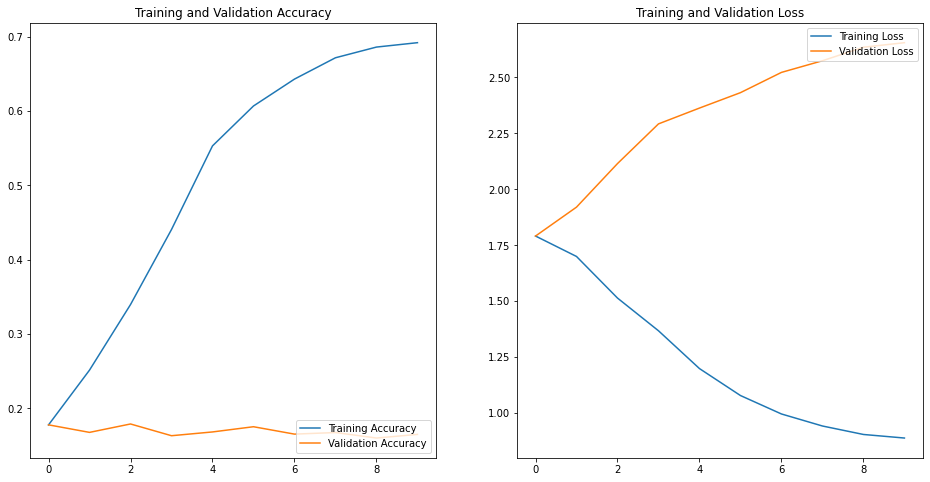

In [66]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [67]:
test_loss, test_accuracy = model.evaluate(x_test_pad, y_test)

print('test set accuracy: ', test_accuracy)

161/161 [==============================] - 2s 14ms/step - loss: 2.6554 - accuracy: 0.1651
test set accuracy:  0.16510720551013947
